In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score


In [34]:
X,y = make_classification(n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          random_state=42,
                          n_clusters_per_class=1,
                          class_sep=2)

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

y_pred = lg.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1])

In [58]:
acc  =accuracy_score(y_test,y_pred)
acc
pr = precision_score(y_test,y_pred)
pr

0.9896907216494846

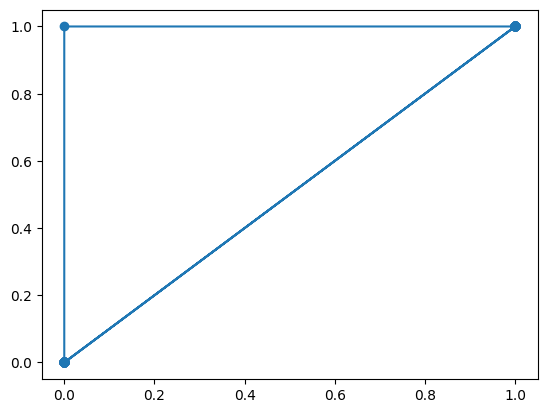

In [38]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_pred)

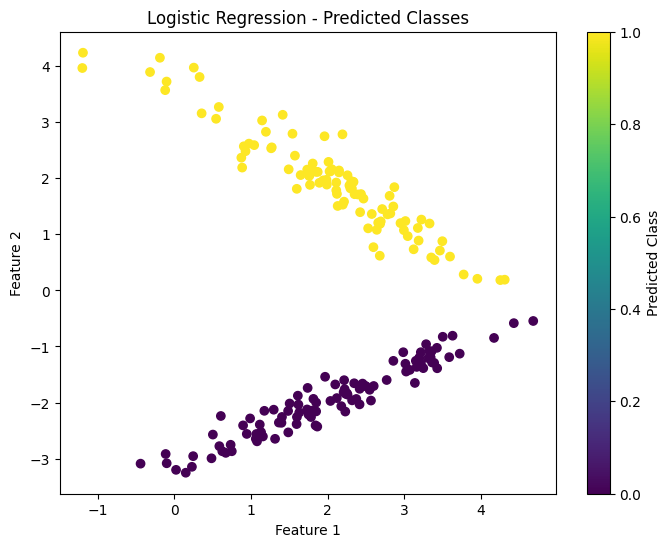

In [39]:
import matplotlib.pyplot as plt

# Scatter plot of actual data
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.title("Logistic Regression - Predicted Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Predicted Class")
plt.show()


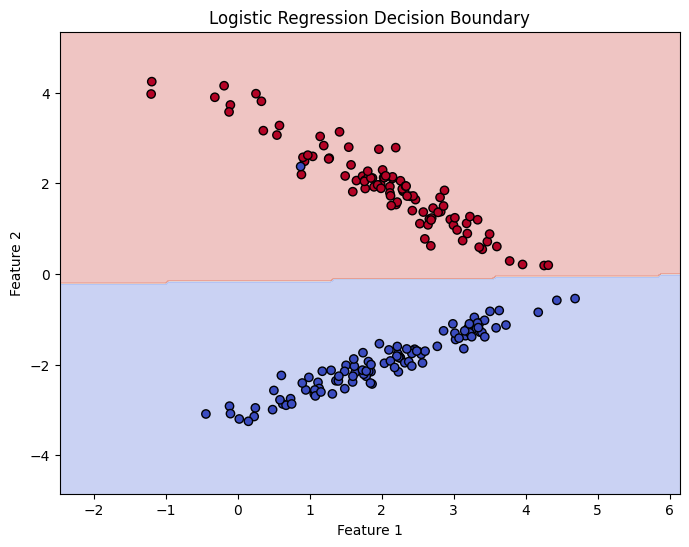

In [40]:
import numpy as np

# Create a grid
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200))
Z = lg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='coolwarm', edgecolors='k')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



In [21]:
print(lg.coef_)
print(lg.intercept_)

[[-0.07305151  3.25737152]]
[0.54514829]


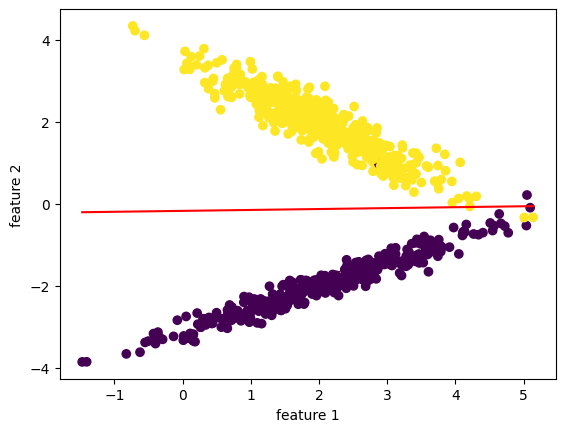

In [42]:
def plot_decision_bounday(w,b,X,y):
    x_values = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
    y_values = -(w[0][0] * x_values + b[0])/w[0][1]
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.plot(x_values,y_values,color = "red")
    plt.show()

plot_decision_bounday(lg.coef_,lg.intercept_,X_train,y_train)

## logistic regression custom


In [ ]:
import numpy as np
class logreg:
    def __init__(self,lr = 0.01,epochs = 1000):
        self.w = None
        self.b = None
        self.lr = lr
        self.epochs = epochs
        self.losses = []

    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def compute_Loss(self,y,y_pred):
        return -np.mean(y*np.log(y_pred+1e-9) + (1-y)*np.log(1-y_pred+1e-9))
    
    def fit(self,X,y):
        n_samples,n_featurs = X.shape
        self.w = np.zeros(n_featurs)
    
        self.b = 0


        for _ in range(self.epochs):
            linear_model = np.dot(X,self.w) + self.b
            y_pred = self.sigmoid(linear_model)
            
            loss = self.compute_Loss(y,y_pred)
            self.losses.append(loss)

            dw = (1/n_samples) * np.dot(X.T,(y_pred-y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self,X):
        linear_model = np.dot(X,self.w) + self.b
        y_pred = self.sigmoid(linear_model)
        return np.where(y_pred >=0.5,1,0)
    


   

In [89]:

model = logreg(lr=0.01, epochs=1000)
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
accc  = accuracy_score(y_test,y_pred1)
accc
prr = precision_score(y_test,y_pred1)
accc

# print(model.losses)
print(model.w)
model.b

[0.01614348 1.7905904 ]


np.float64(0.02635026807857034)

In [79]:
import pandas as pd

In [80]:
result_df = pd.DataFrame({'y' : y_test,\
                          'y_pred' : y_pred,\
                            'custom_y_pred' : y_pred1})
result_df

,y,y_pred,custom_y_pred
0,1,1,1
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
195,1,1,1
196,0,0,0
197,0,0,0
198,1,1,1


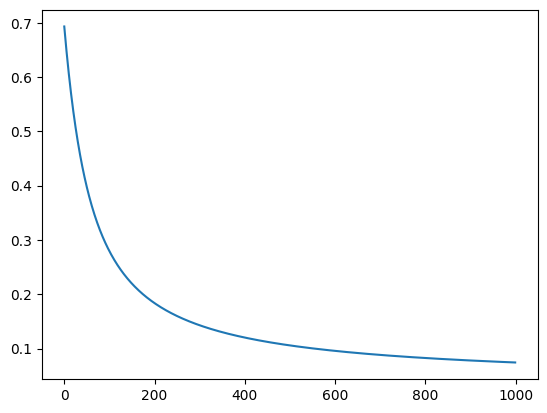

In [81]:
plt.plot(model.losses)

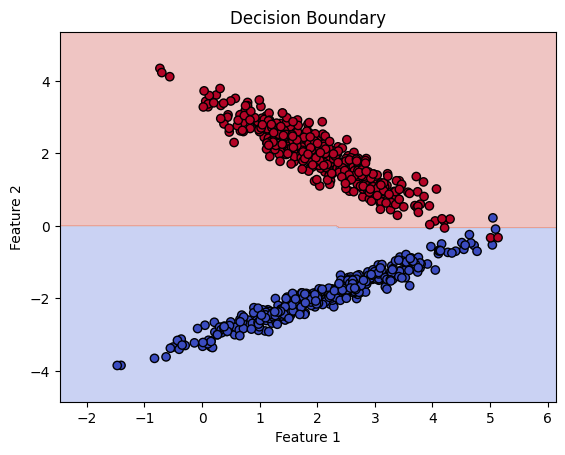

In [82]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # Step 1: Define the range for the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Step 2: Create a grid of points with a small step size
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Step 3: Flatten grid & predict using custom model
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    
    # Step 4: Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    # Step 5: Plot training data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(model, X_train, y_train)

C:\Users\salah\AppData\Local\Temp\ipykernel_25792\1809015231.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


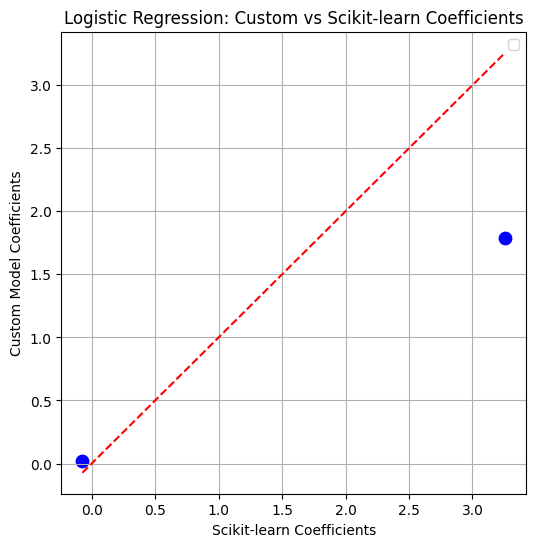

In [85]:
sk_learncoeff = lg.coef_[0]
cust_coeff = model.w

plt.figure(figsize=(6,6))
plt.scatter(sk_learncoeff,cust_coeff,color = "blue",s = 80)
plt.plot([min(sk_learncoeff),max(sk_learncoeff)],[min(sk_learncoeff),max(sk_learncoeff)],'r--')
plt.xlabel('Scikit-learn Coefficients')
plt.ylabel('Custom Model Coefficients')
plt.title('Logistic Regression: Custom vs Scikit-learn Coefficients')
plt.legend()
plt.grid(True)
plt.show()


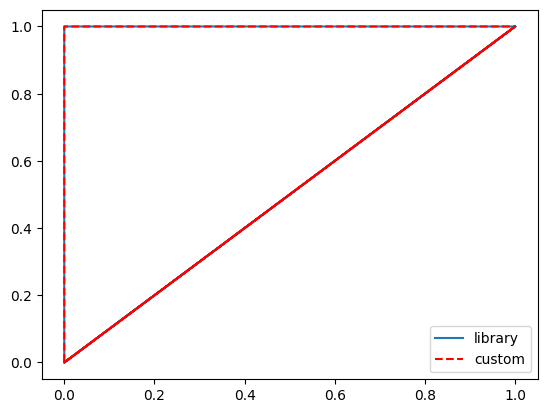

In [88]:
plt.Figure(figsize=(6,6))
plt.plot(y_test,y_pred,label = "library")
plt.plot(y_test,y_pred1,'r--',label = "custom")
plt.legend()
plt.show()